In [375]:
from fromat_combine import *
###二、对比因素模型预测和车载档案预测明细
inf_detail =  pd.read_excel('../test/因素模型预测.xlsx',dtype=str)
cur_inf_detail =  pd.read_excel('../test/因素模型预测noseason.xlsx',dtype=str)
cur_inf_detail['日期']=cur_inf_detail['日期'].apply(lambda x: x.replace(' 00:00:00','').replace('-',''))
inf_detail_comb=pd.merge(inf_detail,cur_inf_detail,left_on=['日期','星期','line_name','station_name','time'],right_on=['日期','星期','线路','车站','时段'],how='left')
inf_detail_comb=inf_detail_comb[['日期','星期','line_name','station_name','time','predict','ori','deviation','precision','deviation_p','best_weight','预测值','预测差值','预测精度','参数']]
inf_detail_comb=inf_detail_comb.dropna()
inf_detail_comb['deviation']=inf_detail_comb['deviation'].astype(int)
inf_detail_comb['预测差值']=inf_detail_comb['预测差值'].astype(int)
inf_detail_comb = inf_detail_comb.reset_index(drop=True)

###三、粗略统计对比结果
inf_detail_comb['better']=inf_detail_comb[['deviation','预测差值']].apply(lambda x:np.sum(abs(x['deviation'])<abs(x['预测差值'])),axis=1)
inf_detail_comb['equal']=inf_detail_comb[['deviation','预测差值']].apply(lambda x:np.sum(abs(x['deviation'])==abs(x['预测差值'])),axis=1)
inf_detail_comb['worse']=inf_detail_comb[['deviation','预测差值']].apply(lambda x:np.sum(abs(x['deviation'])>abs(x['预测差值'])),axis=1)
inf_detail_comb['count']=1
a=inf_detail_comb.groupby(['日期','星期','line_name','station_name'])[['count','better','equal','worse']].sum()
# inf_detail_comb.to_excel('../test/算法对比明细.xlsx',index=None)
# a.to_excel('../test/算法对比统计.xlsx')


In [376]:
a=inf_detail_comb.groupby(['line_name','station_name','best_weight','参数'])[['count','better','equal','worse']].sum()

In [378]:
a.to_excel('../test/算法对比统计1.xlsx')

In [359]:
inf_detail_comb

,日期,星期,line_name,station_name,time,predict,ori,deviation,precision,deviation_p,best_weight,预测值,预测差值,预测精度,better,equal,worse,count
0,20191104,1,房山线,郭公庄,05:00-06:00,128,132,-4,0.9696969696969697,-0.0303030303030303,[[1 3 2]],128,-4,0.96969696969697,0,1,0,1
1,20191104,1,房山线,郭公庄,06:00-07:00,898,876,22,0.9748858447488584,0.02511415525114155,[[1 3 2]],898,22,0.974885844748858,0,1,0,1
2,20191104,1,房山线,郭公庄,07:00-08:00,2371,2311,60,0.9740372133275639,0.02596278667243617,[[1 3 2]],2371,60,0.974037213327564,0,1,0,1
3,20191104,1,房山线,郭公庄,08:00-09:00,1636,1687,-51,0.969768820391227,-0.03023117960877297,[[1 3 2]],1636,-51,0.969768820391227,0,1,0,1
4,20191104,1,房山线,郭公庄,09:00-10:00,655,648,7,0.9891975308641975,0.01080246913580247,[[1 3 2]],655,7,0.989197530864197,0,1,0,1
5,20191104,1,房山线,郭公庄,10:00-11:00,367,392,-25,0.9362244897959183,-0.06377551020408163,[[1 3 2]],367,-25,0.936224489795918,0,1,0,1
6,20191104,1,房山线,郭公庄,11:00-12:00,341,353,-12,0.9660056657223796,-0.0339943342776204,[[1 3 2]],341,-12,0.96600566572238,0,1,0,1
7,20191104,1,房山线,郭公庄,12:00-13:00,357,330,27,0.9181818181818182,0.08181818181818182,[[1 3 2]],357,27,0.918181818181818,0,1,0,1
8,20191104,1,房山线,郭公庄,13:00-14:00,322,354,-32,0.9096045197740112,-0.0903954802259887,[[1 3 2]],322,-32,0.909604519774011,0,1,0,1
9,20191104,1,房山线,郭公庄,14:00-15:00,338,321,17,0.9470404984423676,0.0529595015576324,[[1 3 2]],338,17,0.947040498442368,0,1,0,1


In [377]:
a

count  better  equal  worse
line_name station_name best_weight 参数                                    
10号线      三元桥          [[1 3 2]]   [[1 3 0]]    570      89    378    103
          丰台站          [[1 1 0]]   [[1 1 0]]    570       0    570      0
          亮马桥          [[1 4 0]]   [[1 4 0]]    570       0    570      0
          健德门          [[1 4 0]]   [[1 4 0]]    570       0    570      0
          公主坟          [[1 4 0]]   [[1 4 0]]    570       0    570      0
          六里桥          [[0 0 0]]   [[0 0 0]]    570       0    570      0
          农业展览馆        [[1 4 3]]   [[1 4 0]]    570      87    418     65
          分钟寺          [[3 4 0]]   [[3 4 0]]    570       0    570      0
          劲松           [[1 1 4]]   [[1 3 0]]    570     142    226    202
          北土城          [[3 0 4]]   [[3 1 0]]    570     212     37    321
          十里河          [[1 4 0]]   [[1 4 0]]    570       0    570      0
          双井           [[1 3 0]]   [[1 3 0]]    570       0    570      0
          呼家楼          [[1 1 0]]   [[1 1 0]]    570       0    570      0
          团结湖          [[1 4 4]]   [[1 4 0]]    570      97    383     90
          国贸           [[1 4 4]]   [[1 4 0]]    570      57    427     86
          大红门          [[1 4 0]]   [[1 4 0]]    570       0    570      0
          太阳宫          [[1 4 3]]   [[1 4 0]]    570      96    366    108
          安贞门          [[1 4 0]]   [[1 4 0]]    570       0    570      0
          宋家庄          [[1 3 4]]   [[3 4 0]]    570     162    259    149
          巴沟           [[3 0 4]]   [[1 4 0]]    570     208     20    342
          惠新西街南口       [[0 0 0]]   [[0 0 0]]    570       0    570      0
          慈寿寺          [[3 4 0]]   [[3 4 0]]    570       0    570      0
          成寿寺          [[1 4 4]]   [[1 3 0]]    570     132    306    132
          泥洼           [[3 4 1]]   [[2 3 0]]    570      73    426     71
          海淀黄庄         [[3 4 2]]   [[3 4 0]]    570      94    391     85
          潘家园          [[1 0 1]]   [[1 4 0]]    570     192     23    355
          火器营          [[0 0 0]]   [[0 0 0]]    570       0    570      0
          牡丹园          [[1 2 4]]   [[1 4 0]]    570     125    308    137
          知春路          [[1 2 0]]   [[1 2 0]]    570       0    570      0
          知春里          [[1 3 4]]   [[0 1 0]]    570     311     24    235
...                                             ...     ...    ...    ...
房山线       良乡大学城        [[1 4 4]]   [[1 4 0]]    570      74    390    106
          良乡大学城北       [[1 4 0]]   [[1 4 0]]    570       0    570      0
          良乡大学城西       [[1 4 4]]   [[4 1 0]]    570     197    138    235
          苏庄           [[3 0 2]]   [[1 0 0]]    570     338     16    216
          郭公庄          [[1 3 2]]   [[1 3 0]]    570      83    384    103
          长阳           [[3 4 0]]   [[3 4 0]]    570       0    570      0
          阎村东          [[0 0 0]]   [[0 0 0]]    570       0    570      0
昌平线       北邵洼          [[0 0 0]]   [[0 0 0]]    570       0    570      0
          十三陵景区        [[0 0 0]]   [[0 0 0]]    570       0    570      0
          南邵           [[1 4 4]]   [[1 2 0]]    570     141    261    168
          巩华城          [[1 4 1]]   [[1 4 0]]    570      71    442     57
          昌平           [[3 3 4]]   [[3 2 0]]    570     128    308    134
          昌平东关         [[1 0 4]]   [[4 3 0]]    570     226     36    308
          昌平西山口        [[0 0 0]]   [[0 0 0]]    570       0    570      0
          朱辛庄          [[0 0 0]]   [[0 0 0]]    570       0    570      0
          沙河           [[1 3 4]]   [[1 4 0]]    570     109    356    105
          沙河高教园        [[4 0 3]]   [[2 3 0]]    570     195     34    341
          生命科学园        [[1 4 3]]   [[1 4 0]]    570      84    399     87
          西二旗          [[1 4 0]]   [[1 4 0]]    570       0    570      0
燕房线       大石河东         [[0 0 0]]   [[0 0 0]]    190       0    190      0
          星城           [[0 0 0]]   [[0 0 0]]    342       0    342      0
          紫草坞          [[0 0 0]]   [[0 0 0]]    24

In [355]:
better_p = np.sum(a['better']>a['worse'])/len(a['count'])
equal_p=np.sum(a['better']==a['worse'])/len(a['count'])
worse_p=np.sum(a['better']<a['worse'])/len(a['count'])
print(len(a['count']),better_p,equal_p,worse_p)

11146 0.15700699802619775 0.5846043423649739 0.2583886596088283


In [303]:
better_p = np.sum(a['better']>a['worse'])/len(a['count'])
equal_p=np.sum(a['better']==a['worse'])/len(a['count'])
worse_p=np.sum(a['better']<a['worse'])/len(a['count'])
print(len(a['count']),better_p,equal_p,worse_p)

7433 0.49508946589533165 0.127404816359478 0.3775057177451904


In [302]:
a.to_excel('../test/算法对比统计.xlsx')

# 试验

## 参数测试

In [ ]:
from b_Pre_Fix import  *
from f_Train_Character_Weight import *

from evaluate_weight import  *
from inference import  *

from fromat_combine import *


def test_manager(evaluate_period,eval_way,top_k, algori):
    Parallel(n_jobs=-1)(delayed(inference_manager)\
     (station, weight_pfm_dir, data_series_chara_path, data_series_chara_inf_path,\
      weight_paras_path,weight_evaluate_result_path,evaluate_period,eval_way,top_k, algori) \
     for line,station in line_station_arr)

    station_resids=[]
    for line,station in line_station_arr:
        station_path = 'save/%s'%station
        resid_mean_path = station_path+'/'+'resid_mean'
        if  not os.path.exists(resid_mean_path):
            continue
        station_resid=pl.load(open(resid_mean_path,'rb'))
        station_resids.append(station_resid)
    
    return station_resids



from joblib import Parallel, delayed

all_data=pl.load(open('train_data','rb'))
line_station_arr  = all_data[['line_id','station_id']].drop_duplicates().values


top_ks=[5]
algoris=['weighted_mean']
for top_k in top_ks:
    for algori in algoris:
        shutil.rmtree('save')
        os.mkdir('save')
        
        station='0823'
        train_manager(station,weight_pfm_dir,data_series_chara_path,weight_paras_path,top_k, algori)
#         Parallel(n_jobs=-1)(delayed(train_manager)(station,weight_pfm_dir,data_series_chara_path,weight_paras_path,top_k, algori) \
#                     for line,station in line_station_arr)
        
        
    
        inference_period = ['20191104','20191213']
        evaluate_periods = [ ['20190801','20191101']]
        eval_ways = [ 2 ,3 ]
        n=0
        for evaluate_period in evaluate_periods:
            for eval_way in eval_ways:
                n=n+1
                station_resids = test_manager(evaluate_period,eval_way,top_k, algori)
                resids_pd = pd.DataFrame(station_resids,columns=['station','resid_mean%s'%n])  
                resids_pd['resid%s'%n]=resids_pd['resid_mean%s'%n].apply(lambda x:np.sum(x))
                locals()['resids_pd%s'%n]=resids_pd

        resids_pd = pd.concat([resids_pd1,resids_pd2],axis=1)
        resids_pd = resids_pd[['station','resid_mean1','resid_mean2','resid1','resid2']]
        resids_pd = resids_pd.iloc[:,1:]
        # resids_pd['最优评法'] = resids_pd[['2-mae','2-mape','1-mae','1-mape']].apply(lambda x: np.argmin(x),axis=1)

        file_mark='%s,%s,0.6filt'%(top_k, algori)
        resids_pd.to_excel('../test/因素模型误差(%s).xlsx'%file_mark,index=None)
        output_detail(file_mark)

## 全网测试

In [ ]:
from run_manager import *

def tmp(filter_lev):
    
    all_data=pl.load(open('train_data_2018','rb'))
    line_station_arr  = all_data[['line_id','station_id']].drop_duplicates().values
    

    shutil.rmtree('save')
    os.mkdir('save')
    
    Parallel(n_jobs=-1)(delayed(
        train_manager
        )(station,weight_pfm_dir,data_series_chara_path,weight_paras_path,top_k, algori,filter_level=filter_lev) \
                for line,station in line_station_arr)

       
    Parallel(n_jobs=-1)(delayed(
        inference_manager
        )(station, weight_pfm_dir, data_series_chara_path, data_series_chara_inf_path,\
            weight_paras_path,weight_evaluate_result_path,evaluate_period,eval_way,top_k, algori,filter_level=filter_lev) \
            for line,station in line_station_arr)


    
    file_mark='2018,%s,%s,%sfilt'%(top_k, algori,filter_lev)
    inf_detail = output_detail(file_mark) #格式化并合并所有站内容写入../test/file_mark下
    
    return inf_detail


lev = 0.995

inf_detail=tmp(filter_lev=lev)  

In [5]:
inf_detail

,日期,星期,线路,车站,时段,预测值,实际值,预测差值,预测精度,预测差异率,相似日
0,20181105,1,15号线,崔各庄,05:00-06:00,118,99,19,0.808081,0.191919,"['20181029', '20181030', '20181031', '20181101..."
1,20181105,1,15号线,崔各庄,06:00-07:00,501,525,-24,0.954286,-0.045714,"['20181029', '20181030', '20181031', '20181101..."
2,20181105,1,15号线,崔各庄,07:00-08:00,1034,1001,33,0.967033,0.032967,"['20181029', '20181030', '20181031', '20181101..."
3,20181105,1,15号线,崔各庄,08:00-09:00,1075,1055,20,0.981043,0.018957,"['20181029', '20181030', '20181031', '20181101..."
4,20181105,1,15号线,崔各庄,09:00-10:00,613,606,7,0.988449,0.011551,"['20181029', '20181030', '20181031', '20181101..."
5,20181105,1,15号线,崔各庄,10:00-11:00,240,218,22,0.899083,0.100917,"['20181029', '20181030', '20181031', '20181101..."
6,20181105,1,15号线,崔各庄,11:00-12:00,199,212,-13,0.938679,-0.061321,"['20181029', '20181030', '20181031', '20181101..."
7,20181105,1,15号线,崔各庄,12:00-13:00,194,177,17,0.903955,0.096045,"['20181029', '20181030', '20181031', '20181101..."
8,20181105,1,15号线,崔各庄,13:00-14:00,185,164,21,0.871951,0.128049,"['20181029', '20181030', '20181031', '20181101..."
9,20181105,1,15号线,崔各庄,14:00-15:00,163,166,-3,0.981928,-0.018072,"['20180910', '20181015', '20181029', '20180917..."


In [7]:
inf_detail.loc[inf_detail['时段']!='23:00-24:00','预测精度'].mean() #2018年

0.9240845386171066

## 车站测试

In [3]:
all_data=pl.load(open('train_data_2018','rb'))
line_station_arr  = all_data[['line_id','station_id']].drop_duplicates().values

station='1549' #孙河
filter_lev=0.995

shutil.rmtree('save/%s'%station)

train_manager(station,weight_pfm_dir,data_series_chara_path,weight_paras_path,top_k, algori,filter_level=filter_lev)

inference_manager\
    (station, weight_pfm_dir, data_series_chara_path, data_series_chara_inf_path,\
        weight_paras_path,weight_evaluate_result_path,evaluate_period,eval_way,top_k, algori,filter_level=filter_lev)

1549


/usr/local/python-3.5.6/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/project_passenger/project_passenger_forecast/analysis/b_Pre_Fix.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_series_chara_train[serier_col] = data_series_chara_train[serier_col].apply(lambda x: np.array(eval(x)) if type(x)==str else x )


2020-09-02 19:45:05.870407 :  Start inference date 20181105
[[0.98       0.98213446 0.98508973 0.98805389 0.99102697]
 [0.98       0.98213446 0.98508973 0.98805389 0.99102697]
 [0.61578034 0.65425581 0.83374776 0.941192   0.88584238]
 [0.85076302 0.86812553 0.941192   0.98       0.9604    ]
 [0.71176428 0.75623707 0.83374776 0.941192   0.88584238]
 [0.98       0.98213446 0.98508973 0.98805389 0.99102697]
 [0.93149769 0.941192   0.95050784 0.9604     0.98      ]
 [0.98       0.98213446 0.98508973 0.98805389 0.99102697]
 [0.98       0.98213446 0.98508973 0.98805389 0.99102697]
 [0.98       0.98213446 0.98508973 0.98805389 0.99102697]
 [0.98       0.98213446 0.98508973 0.98805389 0.99102697]
 [0.86624259 0.86812553 0.98       0.941192   0.9604    ]
 [0.80596749 0.85076302 0.87380237 0.94734664 0.92236816]
 [0.80426212 0.83374776 0.8545144  0.941192   0.88584238]
 [0.98       0.98213446 0.98508973 0.98805389 0.99102697]
 [0.98       0.98213446 0.98508973 0.98805389 0.99102697]
 [1.        

[[0.98       0.98213446 0.98508973 0.98805389 0.99102697]
 [0.98       0.98213446 0.98508973 0.98805389 0.99102697]
 [0.61578034 0.78471672 0.83374776 0.88584238 0.941192  ]
 [0.85076302 0.98       0.941192   0.92236816 0.9604    ]
 [0.76781213 0.78471672 0.83374776 0.941192   0.88584238]
 [0.98       0.98213446 0.98508973 0.98805389 0.99102697]
 [0.92236816 0.941192   0.9604     0.9386512  0.98      ]
 [0.98       0.98213446 0.98508973 0.98805389 0.99102697]
 [0.98       0.98213446 0.98508973 0.98805389 0.99102697]
 [0.98       0.98213446 0.98508973 0.98805389 0.99102697]
 [0.98       0.98213446 0.98508973 0.98805389 0.99102697]
 [0.90552797 0.92236816 0.941192   0.9604     0.98      ]
 [0.78471672 0.85076302 0.92236816 0.89016273 0.82105776]
 [0.79177912 0.941192   0.88584238 0.83374776 0.84125143]
 [0.98       0.98213446 0.98508973 0.98805389 0.99102697]
 [0.98       0.98213446 0.98508973 0.98805389 0.99102697]
 [1.         1.         1.         1.         1.        ]
 [0.98       0

2020-09-02 19:45:09.036615 :  Start inference date 20181119
[[0.98       0.98213446 0.98508973 0.98805389 0.99102697]
 [0.98       0.98213446 0.98508973 0.98805389 0.99102697]
 [0.7385691  0.78471672 0.83374776 0.88584238 0.941192  ]
 [0.9039208  0.92236816 0.941192   0.9604     0.98      ]
 [0.74852037 0.78471672 0.941192   0.83374776 0.88584238]
 [0.98       0.98213446 0.98508973 0.98805389 0.99102697]
 [0.941192   0.94602208 0.9604     0.96532865 0.98      ]
 [0.98       0.98213446 0.98508973 0.98805389 0.99102697]
 [0.98       0.98213446 0.98508973 0.98805389 0.99102697]
 [0.98       0.98213446 0.98508973 0.98805389 0.99102697]
 [0.98       0.98213446 0.98508973 0.98805389 0.99102697]
 [0.92880456 0.94775976 0.9604     0.941192   0.98      ]
 [0.78488584 0.85076302 0.92236816 0.92256695 0.85094638]
 [0.78471672 0.80714664 0.83374776 0.88584238 0.941192  ]
 [0.98       0.98213446 0.98508973 0.98805389 0.99102697]
 [0.98       0.98213446 0.98508973 0.98805389 0.99102697]
 [1.        

[[0.98       0.98805389 0.99102697 0.994009   0.997     ]
 [0.98       0.98805389 0.99102697 0.994009   0.997     ]
 [0.78471672 0.941192   0.83374776 0.7866897  0.88584238]
 [0.9039208  0.92236816 0.98       0.9604     0.941192  ]
 [0.7385691  0.941192   0.78471672 0.88584238 0.83374776]
 [0.98       0.98805389 0.99102697 0.994009   0.997     ]
 [0.9039208  0.92236816 0.941192   0.9604     0.98      ]
 [0.98       0.98805389 0.99102697 0.994009   0.997     ]
 [0.98       0.98805389 0.99102697 0.994009   0.997     ]
 [0.98       0.98805389 0.99102697 0.994009   0.997     ]
 [0.98       0.98805389 0.99102697 0.994009   0.997     ]
 [0.9039208  0.92236816 0.98       0.9604     0.941192  ]
 [0.66760797 0.72379772 0.78471672 0.92236816 0.85076302]
 [0.7385691  0.941192   0.83374776 0.78471672 0.88584238]
 [0.98       0.98805389 0.99102697 0.994009   0.997     ]
 [0.98       0.98805389 0.99102697 0.994009   0.997     ]
 [1.         1.         1.         1.         1.        ]
 [0.98       0

 [1.         1.         1.         1.         1.        ]]
Top-k likeness  day for each time period :
 [['20181122', '20181123', '20181126', '20181127', '20181128'], ['20181122', '20181123', '20181126', '20181127', '20181128'], ['20181121', '20181127', '20181115', '20181128', '20181122'], ['20181025', '20181101', '20181122', '20181115', '20181108'], ['20181114', '20181115', '20181121', '20181122', '20181128'], ['20181122', '20181123', '20181126', '20181127', '20181128'], ['20181101', '20181126', '20181108', '20181115', '20181122'], ['20181122', '20181123', '20181126', '20181127', '20181128'], ['20181122', '20181123', '20181126', '20181127', '20181128'], ['20181122', '20181123', '20181126', '20181127', '20181128'], ['20181122', '20181123', '20181126', '20181127', '20181128'], ['20181108', '20181122', '20181121', '20181115', '20181128'], ['20181121', '20181108', '20181128', '20181122', '20181115'], ['20181114', '20181115', '20181121', '20181122', '20181128'], ['20181122', '20181123', '20

[[0.98       0.98213446 0.98508973 0.994009   0.997     ]
 [0.98       0.98213446 0.98508973 0.994009   0.997     ]
 [0.83374776 0.87113536 0.88584238 0.941192   0.92556604]
 [0.9039208  0.92236816 0.941192   0.9604     0.98      ]
 [0.83374776 0.84171113 0.88584238 0.89430332 0.941192  ]
 [0.98       0.98213446 0.98508973 0.994009   0.997     ]
 [0.9039208  0.92236816 0.9604     0.941192   0.98      ]
 [0.98       0.98213446 0.98508973 0.994009   0.997     ]
 [0.98       0.98213446 0.98508973 0.994009   0.997     ]
 [0.98       0.98213446 0.98508973 0.994009   0.997     ]
 [0.98       0.98213446 0.98508973 0.994009   0.997     ]
 [0.9039208  0.9604     0.92236816 0.941192   0.98      ]
 [0.66760797 0.92236816 0.78471672 0.72379772 0.85076302]
 [0.83374776 0.86935207 0.88584238 0.92367133 0.941192  ]
 [0.98       0.98213446 0.98508973 0.994009   0.997     ]
 [0.98       0.98213446 0.98508973 0.994009   0.997     ]
 [1.         1.         1.         1.         1.        ]
 [0.98       0

[[0.98       0.98213446 0.98508973 0.994009   0.997     ]
 [0.98       0.98213446 0.98508973 0.994009   0.997     ]
 [0.84973592 0.86120244 0.88584238 0.941192   0.90282952]
 [0.9039208  0.92236816 0.9604     0.941192   0.98      ]
 [0.80515376 0.83374776 0.85546176 0.88584238 0.941192  ]
 [0.98       0.98213446 0.98508973 0.994009   0.997     ]
 [0.9039208  0.92236816 0.941192   0.9604     0.98      ]
 [0.98       0.98213446 0.98508973 0.994009   0.997     ]
 [0.98       0.98213446 0.98508973 0.994009   0.997     ]
 [0.98       0.98213446 0.98508973 0.994009   0.997     ]
 [0.98       0.98213446 0.98508973 0.994009   0.997     ]
 [0.9039208  0.92236816 0.941192   0.9604     0.98      ]
 [0.73316412 0.75085717 0.78471672 0.92236816 0.85076302]
 [0.83374776 0.86400221 0.88584238 0.941192   0.9179872 ]
 [0.98       0.98213446 0.98508973 0.994009   0.997     ]
 [0.98       0.98213446 0.98508973 0.994009   0.997     ]
 [1.         1.         1.         1.         1.        ]
 [0.98       0

In [11]:
data_series_chara.loc[data_series_chara['日期'].isin(['20181029', '20181030', '20181031', '20181101', '20181102'])]

,line_id,station_id,日期,星期,季节,总量,分时序列,inference,best_weight,likeness_topk_day_list
86,15,1549,20181029,1,4,4503,"[50, 231, 736, 845, 449, 183, 141, 166, 109, 1...",NaN,NaN,NaN
87,15,1549,20181030,2,4,4477,"[49, 231, 652, 854, 441, 183, 116, 161, 134, 1...",NaN,NaN,NaN
88,15,1549,20181031,3,4,4610,"[47, 230, 677, 799, 430, 180, 135, 147, 128, 1...",NaN,NaN,NaN
89,15,1549,20181101,4,4,4485,"[45, 260, 668, 823, 412, 162, 129, 138, 123, 1...",NaN,NaN,NaN
90,15,1549,20181102,5,4,4696,"[57, 228, 712, 794, 413, 186, 144, 173, 148, 1...",NaN,NaN,NaN


In [8]:
data_series_chara_inf

,line_id,station_id,日期,星期,季节,总量,分时序列,inference,best_weight,likeness_topk_day_list
91,15,1549,20181105,1,4,4345,"[39, 254, 664, 807, 455, 136, 127, 148, 115, 1...","[49, 236, 726, 843, 430, 178, 128, 156, 128, 1...",[[[0 1]\n [0 1]\n [1 3]\n [2 1]\n [1 3]\n ...,"[['20181029', '20181030', '20181031', '2018110..."
92,15,1549,20181106,2,4,4437,"[45, 236, 692, 807, 422, 195, 109, 142, 144, 1...","[47, 240, 681, 811, 470, 169, 117, 153, 129, 1...",[[[0 1]\n [0 1]\n [1 3]\n [2 1]\n [1 3]\n ...,"[['20181030', '20181031', '20181101', '2018110..."
93,15,1549,20181107,3,4,4633,"[40, 271, 693, 788, 468, 184, 127, 153, 132, 1...","[46, 241, 698, 805, 438, 171, 144, 149, 131, 1...",[[[0 1]\n [0 1]\n [1 3]\n [2 1]\n [1 3]\n ...,"[['20181031', '20181101', '20181102', '2018110..."
94,15,1549,20181108,4,4,4506,"[47, 263, 652, 835, 460, 141, 123, 153, 132, 1...","[45, 249, 696, 784, 446, 172, 128, 150, 132, 1...",[[[0 1]\n [0 1]\n [1 3]\n [2 1]\n [1 3]\n ...,"[['20181101', '20181102', '20181105', '2018110..."
95,15,1549,20181109,5,4,4693,"[43, 215, 727, 795, 404, 171, 135, 166, 152, 1...","[45, 250, 686, 781, 431, 168, 134, 153, 134, 1...",[[[0 1]\n [0 1]\n [1 3]\n [2 1]\n [1 3]\n ...,"[['20181102', '20181105', '20181106', '2018110..."
96,15,1549,20181112,1,4,4410,"[54, 273, 693, 790, 455, 188, 134, 154, 101, 9...","[42, 247, 707, 825, 440, 165, 125, 152, 135, 1...",[[[0 1]\n [0 1]\n [1 3]\n [2 1]\n [1 3]\n ...,"[['20181105', '20181106', '20181107', '2018110..."
97,15,1549,20181113,2,4,4540,"[49, 259, 659, 845, 471, 154, 134, 121, 100, 1...","[45, 251, 670, 810, 462, 175, 115, 153, 132, 1...",[[[0 1]\n [0 1]\n [1 3]\n [2 1]\n [1 3]\n ...,"[['20181106', '20181107', '20181108', '2018110..."
98,15,1549,20181114,3,4,4520,"[55, 229, 668, 864, 439, 161, 142, 170, 130, 1...","[46, 256, 680, 809, 447, 167, 141, 149, 123, 1...",[[[0 1]\n [0 1]\n [1 3]\n [2 1]\n [1 3]\n ...,"[['20181107', '20181108', '20181109', '2018111..."
99,15,1549,20181115,4,4,4402,"[50, 233, 644, 843, 440, 164, 143, 146, 125, 1...","[49, 247, 675, 804, 442, 163, 127, 152, 122, 1...",[[[0 1]\n [0 1]\n [1 3]\n [2 1]\n [1 3]\n ...,"[['20181108', '20181109', '20181112', '2018111..."
100,15,1549,20181116,5,4,4736,"[52, 232, 660, 833, 453, 173, 142, 190, 149, 1...","[50, 241, 695, 785, 420, 167, 135, 151, 121, 1...",[[[0 1]\n [0 1]\n [1 3]\n [2 1]\n [1 3]\n ...,"[['20181109', '20181112', '20181113', '2018111..."


In [7]:
# #分时精度
station_path = 'save/%s'%station
data_series_chara_inf_path = station_path+'/'+data_series_chara_inf_path
data_series_chara = pl.load(open(data_series_chara_inf_path,'rb'))
all_dates_ts = data_series_chara["日期"]
inference_dates=all_dates_ts[(all_dates_ts>=inference_period[0]) & (all_dates_ts<=inference_period[-1]) ]
data_series_chara_inf = data_series_chara.loc[inference_dates.index]
ori_array = data_series_chara_inf['分时序列'].values
inference_array = data_series_chara_inf['inference'].apply(lambda x:np.array(eval(x))).values
acc = []
for i in range(len(ori_array)):
    ori_ts = ori_array[i]
    infer_ts = inference_array[i]
    cur_acc = 1-np.abs(ori_ts-infer_ts)/ori_ts
    acc.append(cur_acc)
    print(ori_ts,'\n',infer_ts,'\n',np.round(cur_acc,decimals=3))
    ori_ts

[ 39 254 664 807 455 136 127 148 115 124 120 178 457 391 159  80  55  34
   2] 
 [ 49 236 726 843 430 178 128 156 128 141 146 187 396 428 177  99  52  25
   4] 
 [0.744 0.929 0.907 0.955 0.945 0.691 0.992 0.946 0.887 0.863 0.783 0.949
 0.867 0.905 0.887 0.762 0.945 0.735 0.   ]
[ 45 236 692 807 422 195 109 142 144 113 155 198 439 412 163  77  59  25
   4] 
 [ 47 240 681 811 470 169 117 153 129 141 146 179 422 416 177  94  57  28
   4] 
 [0.956 0.983 0.984 0.995 0.886 0.867 0.927 0.923 0.896 0.752 0.942 0.904
 0.961 0.99  0.914 0.779 0.966 0.88  1.   ]
[ 40 271 693 788 468 184 127 153 132 135 166 192 490 413 194 102  50  29
   6] 
 [ 46 241 698 805 438 171 144 149 131 139 148 204 352 461 179  91  56  26
   4] 
 [0.85  0.889 0.993 0.978 0.936 0.929 0.866 0.974 0.992 0.97  0.892 0.938
 0.718 0.884 0.923 0.892 0.88  0.897 0.667]
[ 47 263 652 835 460 141 123 153 132 114 170 198 485 408 170  86  46  16
   7] 
 [ 45 249 696 784 446 172 128 150 132 134 148 188 397 451 179  92  61  25
   5] 
 [

In [9]:
#loss_metric = "odsum"
print(station)
print(np.array(acc).shape)
print(np.array(acc).mean()) 
print(np.array(acc)[:,:-1].mean()) #过滤24点

1549
(29, 19)
0.8646650899480937
0.8931747329370606


## 疫情因素

In [14]:
rn_data = pd.read_csv("../info/20190101-20200907.csv")
rn_data = preprocessing(rn_data)

In [20]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
rn_data

,日期,星期,总量,分时序列
0,20190104,5,6483376,"[37467,247692,808522,837954,433384,221549,2001..."
1,20190107,1,6321238,"[44663,274771,842059,864658,439695,220167,1932..."
2,20190108,2,6363563,"[38011,252938,822155,850969,439744,224615,2043..."
3,20190109,3,6383030,"[37691,244077,811890,848291,451991,232967,2086..."
4,20190110,4,6375661,"[37003,244961,805761,842736,453537,237563,2070..."
5,20190111,5,6665456,"[38239,245135,794816,834367,450805,242197,2188..."
6,20190114,1,6380474,"[44625,269238,840032,860784,444602,229572,2015..."
7,20190115,2,6342279,"[38719,251022,818314,848427,444736,232265,2067..."
8,20190116,3,6446629,"[38244,246515,811898,841364,452106,240656,2160..."
9,20190117,4,6471945,"[37987,244719,799086,840623,456486,247942,2215..."


In [56]:
mean_2019=rn_data['总量'].loc[:211].mean()
mean_2019

6642508.844339622

In [64]:
rn_data.loc[211:,'疫情'] = rn_data.loc[211:,'总量'].apply(lambda x: np.round(mean_2019/x,decimals=3) )
rn_data.loc[:211,'疫情'] = 0

In [73]:
import pyspark
from pyspark import SparkConf, SparkContext
# conf = SparkConf().setMaster('local').setAppName('anormal_detect_compute')
# conf.set("spark.dynamicAllocation.maxExecutors",4) #32
# sc = SparkContext.getOrCreate(conf)
# sess = pyspark.sql.SparkSession(sc)

# from pyhive import hive
# data_conn = hive.Connection(host='10.254.5.100',
#                        port=10000,
#                        username='ETL',
#                        database='default')
# cur = data_conn.cursor()

pd_data = rn_data[['日期','疫情']]
spark_df = sess.createDataFrame(pd_data.values.tolist(), list(pd_data.columns))    
hdfs_file='hdfs:/user/hive/warehouse/bmnc_infer.db/tmp/train_id=1'
spark_df.write.mode("overwrite").option("delimiter", ",").format('csv').save(hdfs_file)


cur.execute('msck repair table bmnc_infer.tmp')

In [70]:
rn_data['日期']=rn_data['日期'].astype(str)

In [65]:
rn_data

,日期,星期,总量,分时序列,disease,疫情
0,20190104,5,6483376,"[37467, 247692, 808522, 837954, 433384, 221549...",0.000,0.000
1,20190107,1,6321238,"[44663, 274771, 842059, 864658, 439695, 220167...",0.000,0.000
2,20190108,2,6363563,"[38011, 252938, 822155, 850969, 439744, 224615...",0.000,0.000
3,20190109,3,6383030,"[37691, 244077, 811890, 848291, 451991, 232967...",0.000,0.000
4,20190110,4,6375661,"[37003, 244961, 805761, 842736, 453537, 237563...",0.000,0.000
5,20190111,5,6665456,"[38239, 245135, 794816, 834367, 450805, 242197...",0.000,0.000
6,20190114,1,6380474,"[44625, 269238, 840032, 860784, 444602, 229572...",0.000,0.000
7,20190115,2,6342279,"[38719, 251022, 818314, 848427, 444736, 232265...",0.000,0.000
8,20190116,3,6446629,"[38244, 246515, 811898, 841364, 452106, 240656...",0.000,0.000
9,20190117,4,6471945,"[37987, 244719, 799086, 840623, 456486, 247942...",0.000,0.000


In [42]:
ts=rn_data['总量'].loc[212:].values
ts = ts.reshape(-1,1)

In [50]:
divide_ts = np.array([i.tolist() for i in rn_data['分时序列'].loc[212:].values])

In [30]:
divide_ts.shape

(327, 19)

In [18]:
from matplotlib import pyplot as plt

In [86]:
for w in range(1,6):
    a=0.9875/w-0.1875
    print(a)

0.8
0.30625
0.14166666666666666
0.05937500000000001
0.010000000000000009


In [84]:
(0.79)*(5/4)

0.9875

In [53]:
(0.1)**(1/6)

0.6812920690579614

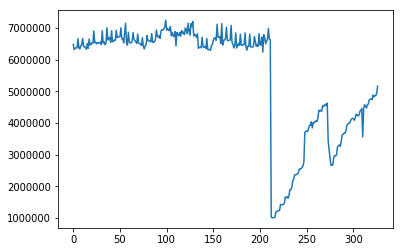

In [19]:
plt.plot(rn_data['总量'])

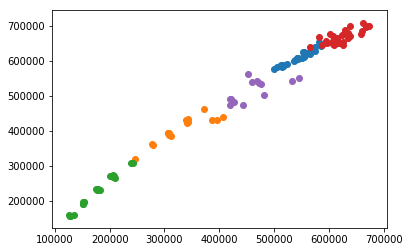

In [51]:
from sklearn.cluster import KMeans

def kmeans(ts, n_cluster):
    kmeans=KMeans(n_clusters=n_cluster)
    kmeans.fit(ts)
    label_pred = kmeans.labels_ 
    x=[]
    for i in range(n_cluster):
        x.append(divide_ts[label_pred==i])
    for i in range(n_cluster):
        plt.scatter(x[i][:,2],x[i][:,3])
        
kmeans(divide_ts, 5)

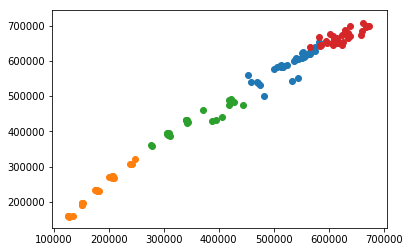

In [52]:
kmeans(divide_ts, 4)

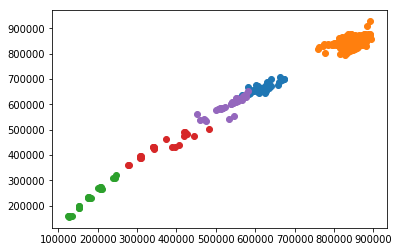

In [48]:
label_pred = kmeans.labels_ 
x=[]
for i in range(n_cluster):
    x.append(divide_ts[label_pred==i])
for i in range(n_cluster):
    plt.scatter(x[i][:,2],x[i][:,3])

# 同期均值法

In [22]:
#均值法
def format_output2(data_series_chara1,periods):
    
    data_series_chara1 = data_series_chara1.loc[~data_series_chara1['inference'].isna()]
    data_series_chara1['分时序列'] = data_series_chara1['分时序列'].apply(lambda x: list(x))
    data_series_chara1['inference'] = data_series_chara1['inference'].apply(lambda x: eval(x))
    data_series_chara1['tmp'] = data_series_chara1[['分时序列','inference']].apply(lambda x : ['%s'%list(i) for i in list(np.c_[x['分时序列'],x['inference']])],axis=1)
    data_series_chara1[periods]=data_series_chara1['tmp'].apply(pd.Series)
    data_series_chara2=pd.melt(data_series_chara1,id_vars=['line_id','station_id','日期','星期'],\
            value_vars=periods,\
            var_name='time',value_name='ori_predict')
    data_series_chara2[['ori','predict']] = data_series_chara2['ori_predict'].apply(lambda x: pd.Series(eval(x)))

    data_series_chara2=data_series_chara2[['日期','星期','line_id','station_id','time','ori','predict']]
    data_series_chara2 = data_series_chara2.sort_values(by=['日期','time'])
    
    return data_series_chara2


def mean_alg(station,savedir,same_week=True,filter_lev=0.6):
    size=60
    lin = ["%02d:%02d" %(h,m) for h in range(5, 24) for m in range(0, 60, size)]+['24:00'] #5分钟粒度 ['02:00', '02:05', 02:10', ...] （从2:00开始到次日2点(26:00))
    periods = [ '%s-%s'%(lin[i],lin[i+1]) for i in range(len(lin)-1) ]

    data_series_chara = all_data.loc[all_data['station_id']==station]
    data_series_chara = data_series_chara.reset_index(drop=True)
    data_series_chara = preprocessing(data_series_chara)
    data_series_chara = filter_and_fix(data_series_chara, end_date=inference_period[0], filter_group='星期', serier_col='分时序列',level=filter_lev)

    data=data_series_chara

    mean_num = 5
    all_dates_ts = data_series_chara["日期"]
    inference_dates=all_dates_ts[(all_dates_ts>=inference_period[0]) & (all_dates_ts<=inference_period[-1]) ]

    try:
        for date in inference_dates:
            predict_week = data.loc[data["日期"]==date]["星期"].iloc[0]
            series = data.loc[data["日期"]==date]["分时序列"].iloc[0]
            if same_week:
                like_data = data.loc[(data["星期"]==predict_week)
                                    & (data["日期"]<date)].iloc[-mean_num:]    
            else:
                like_data = data.loc[(data["日期"]<date)].iloc[-mean_num:] 
            inference_series = like_data["分时序列"].mean().astype(int) 
            data_series_chara.loc[(data_series_chara['日期']==date),'inference'] = str(list(inference_series))

        data_series_chara_inf_fm = format_output2(data_series_chara,periods)
        pl.dump(data_series_chara_inf_fm,open('%s/%s'%(savedir,station),'wb'))
    except Exception as e:
        print(e)
        return

savedir='save1'
Parallel(n_jobs=-1)(delayed(mean_alg)\
     (station,savedir=savedir,same_week=True,filter_lev=lev) \
     for line,station in line_station_arr)  
inf_detail = pd.DataFrame([])
savedir='save1'
for station in os.listdir(savedir):
    data_series_chara_inf_fm = pl.load(open('%s/%s'%(savedir,station),'rb')).dropna()
    inf_detail = pd.concat([inf_detail,data_series_chara_inf_fm]) 

# pl.dump(inf_detail,open('%s/%s'%(savedir,station),'wb'))
    

Parallel(n_jobs=-1)(delayed(mean_alg)\
     (station,savedir=savedir,same_week=False,filter_lev=lev) \
     for line,station in line_station_arr)
inf_detail = pd.DataFrame([])
savedir='save2'
for station in os.listdir(savedir):
    data_series_chara_inf_fm = pl.load(open('%s/%s'%(savedir,station),'rb')).dropna()
    inf_detail = pd.concat([inf_detail,data_series_chara_inf_fm]) 
    
    
inf_detail['predict'] = inf_detail['predict'].astype(int)
inf_detail['ori'] = inf_detail['ori'].astype(int)
inf_detail['deviation']=inf_detail['predict']-inf_detail['ori']
inf_detail['deviation_p'] = inf_detail[['deviation','ori']].apply(lambda x: x['deviation']/x['ori'] if x['ori']!=0 else 0,axis=1)
inf_detail['precision'] = inf_detail['deviation_p'].apply(lambda x: (1-abs(x)))

station_info=pd.read_csv('../station_info.csv',dtype=str)
file_mark='5日同星期0.6'
inf_detail = pd.merge(inf_detail,station_info,how='left',on=['line_id','station_id'])
inf_detail = inf_detail[['日期','星期','line_name','station_name','time','predict','ori','deviation','precision','deviation_p']]
inf_detail.columns = ['日期','星期','线路','车站','时段','预测值','实际值','预测差值','预测精度','预测差异率']
inf_detail.to_excel('../test/均值预测(%s).xlsx'%file_mark,index=None)
inf_detail[~(inf_detail['时段']=='23:00-24:00')]['预测精度'].mean() #0.6  5日同星期

In [14]:
#因素法
data=data_series_chara
resid_list = []
resid_percent_list = []
mean_num = 1
for date in inference_dates:
    predict_week = data.loc[data["日期"]==date]["星期"].iloc[0]
    series = data.loc[data["日期"]==date]["分时序列"].iloc[0]

    inference_series = eval(data.loc[data["日期"]==date]["inference"].iloc[0])
    resid = np.abs(inference_series-series).astype(int)
    print('\n###Inferencing',date,series)
    print("\tmean-method date and series",inference_series)
    print("\tresid is ",resid,sum(resid))   
    resid_percent = np.abs(inference_series-series)/series
    resid_percent_list.append(resid_percent)
    resid_list.append(resid)

ori_model_resid = (np.array(resid_list).mean(axis=0)).astype(int) 
print(ori_model_resid)
print(ori_model_resid.sum())


###Inferencing 20191011 [ 356 1875 4939 3412 1357  732  526  712  679  588  576  746 1060  787
  327  207  114   52   17]
	mean-method date and series [375, 1969, 4896, 3304, 1260, 796, 627, 953, 839, 736, 620, 839, 1022, 969, 477, 260, 195, 103, 18]
	resid is  [ 19  94  43 108  97  64 101 241 160 148  44  93  38 182 150  53  81  51
   1] 1768

###Inferencing 20191014 [ 416 2102 5066 3595 1292  722  627  694  666  641  695  635  991  817
  330  216  151   47    9]
	mean-method date and series [452, 2092, 5024, 3370, 1213, 722, 617, 671, 660, 614, 613, 627, 937, 921, 345, 227, 173, 88, 8]
	resid is  [ 36  10  42 225  79   0  10  23   6  27  82   8  54 104  15  11  22  41
   1] 796

###Inferencing 20191015 [ 383 1989 5038 3607 1442  848  615  765  702  687  615  663 1046  769
  293  225  174   70    7]
	mean-method date and series [373, 2020, 4952, 3411, 1322, 731, 634, 681, 655, 649, 639, 637, 969, 899, 338, 219, 170, 74, 7]
	resid is  [ 10  31  86 196 120 117  19  84  47  38  24  26  

In [150]:
inf_detail

,日期,星期,line_name,station_name,time,predict,ori,deviation,precision,deviation_p
0,20191104,1,S1线,桥户营,05:00-06:00,48,46,2,0.956522,0.043478
1,20191104,1,S1线,桥户营,06:00-07:00,294,322,-28,0.913043,-0.086957
2,20191104,1,S1线,桥户营,07:00-08:00,1329,1360,-31,0.977206,-0.022794
3,20191104,1,S1线,桥户营,08:00-09:00,923,945,-22,0.976720,-0.023280
4,20191104,1,S1线,桥户营,09:00-10:00,179,159,20,0.874214,0.125786
5,20191104,1,S1线,桥户营,10:00-11:00,72,72,0,1.000000,0.000000
6,20191104,1,S1线,桥户营,11:00-12:00,57,70,-13,0.814286,-0.185714
7,20191104,1,S1线,桥户营,12:00-13:00,75,93,-18,0.806452,-0.193548
8,20191104,1,S1线,桥户营,13:00-14:00,67,64,3,0.953125,0.046875
9,20191104,1,S1线,桥户营,14:00-15:00,49,50,-1,0.980000,-0.020000
